# Data Cleaning

In [111]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [112]:
df = pd.read_csv('/Users/amytran/Downloads/complaints.csv', low_memory=False) # Full data, not needed after downloading filtered
df.head(20)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-09-12,Debt collection,Credit card debt,Attempts to collect debt not owed,Debt was result of identity theft,NaN,NaN,"Aldous & Associates, PLLC",PA,19148,NaN,NaN,Web,2024-09-12,Closed with explanation,Yes,NaN,10094696
1,2024-09-12,Debt collection,Credit card debt,Attempts to collect debt not owed,Debt was result of identity theft,NaN,NaN,"Credence Resource Management, LLC",PA,19148,NaN,NaN,Web,2024-09-12,In progress,Yes,NaN,10094726
2,2024-09-12,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information is missing that should be on the r...,NaN,NaN,ALLY FINANCIAL INC.,NC,27909,NaN,NaN,Web,2024-09-12,In progress,Yes,NaN,10094777
3,2024-09-12,Debt collection,Telecommunications debt,Written notification about debt,Didn't receive enough information to verify debt,NaN,NaN,"Credence Resource Management, LLC",TX,76542,NaN,NaN,Web,2024-09-12,In progress,Yes,NaN,10094869
4,2024-09-10,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",TX,761XX,NaN,NaN,Web,2024-09-10,In progress,Yes,NaN,10068910
5,2024-09-08,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",IL,60490,NaN,NaN,Web,2024-09-08,In progress,Yes,NaN,10058823
6,2024-09-08,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Investigation took more than 30 days,NaN,NaN,"EQUIFAX, INC.",MI,48237,NaN,NaN,Web,2024-09-08,In progress,Yes,NaN,10063876
7,2024-09-10,Vehicle loan or lease,Loan,Incorrect information on your report,Account information incorrect,NaN,NaN,ALLY FINANCIAL INC.,NY,11226,NaN,NaN,Web,2024-09-10,In progress,Yes,NaN,10077110
8,2024-09-08,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Investigation took more than 30 days,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,79932,NaN,NaN,Web,2024-09-08,In progress,Yes,NaN,10058878
9,2024-09-08,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Investigation took more than 30 days,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,79938,NaN,NaN,Web,2024-09-08,In progress,Yes,NaN,10058929


In [113]:
# Ensure same data type in row 5

column_5_name = df.columns[4]
unique_values_column_5 = df[column_5_name].unique()
print(f"Unique values in column '{column_5_name}':")
print(unique_values_column_5)
column_5_name = df.columns[4]
float_values = df[df[column_5_name].apply(lambda x: isinstance(x, float))]
float_values
column_5_name = df.columns[4]
print(f"Data type of column '{column_5_name}': {df[column_5_name].dtype}")
data_types = df[column_5_name].apply(type).value_counts()
print(f"\nData types of individual elements in column '{column_5_name}':")
print(data_types)

# Fixed by replacing null values with 'No Sub-issue'
df['Sub-issue'] = df['Sub-issue'].fillna('No Sub-issue')

Unique values in column 'Sub-issue':
['Debt was result of identity theft'
 'Information is missing that should be on the report'
 "Didn't receive enough information to verify debt"
 'Their investigation did not fix an error on your report'
 "Credit inquiries on your report that you don't recognize"
 'Investigation took more than 30 days' 'Account information incorrect'
 'Problem canceling credit monitoring or identify theft protection service'
 'Unable to receive car title or other problem after the loan is paid off'
 'Reporting company used your report improperly'
 'Other problem getting your report or credit score'
 'You told them to stop contacting you, but they keep trying'
 'Frequent or repeated calls' 'Problem making or receiving payments'
 'Deposits and withdrawals' 'Information belongs to someone else'
 'Account status incorrect' 'Personal information incorrect'
 'Difficulty submitting a dispute or getting information about a dispute over the phone'
 'Problem accessing account'

In [114]:
# Define lists for banks, fintech lenders, and products
banks_list = ['BANK OF AMERICA, NATIONAL ASSOCIATION', 'CITIBANK, N.A.', 
              'WELLS FARGO & COMPANY', 'JPMORGAN CHASE & CO.']
fintech_list = ['Rocket Mortgage, LLC', 'PENNYMAC LOAN SERVICES, LLC.', 
                'Freedom Mortgage Company', 'Home Point Financial Corporation']
product_list = ['Mortgage', 'Student loan', 'Vehicle loan or lease', 
                'Credit card or prepaid card', 'Checking or savings account']

# Filter for bank data and products in product_list
banks_data = df[df['Company'].isin(banks_list) & df['Product'].isin(product_list)].copy()
banks_data['Type'] = 'Bank'  # Add a column to indicate it's a bank

# Filter for fintech data and products in product_list
fintech_data = df[df['Company'].isin(fintech_list) & df['Product'].isin(product_list)].copy()
fintech_data['Type'] = 'Fintech'  # Add a column to indicate it's a fintech lender

# Combine  datasets
filtered = pd.concat([banks_data, fintech_data])

# Save to CSV
filtered.to_csv('/Users/amytran/Downloads/BankComplaints/filtered.csv', index=False)

In [92]:
filtered_data = pd.read_csv('/Users/amytran/Downloads/BankComplaints/BankComplaints/filtered.csv')
filtered_data.head(5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Type
0,2024-09-08,Checking or savings account,Checking account,Managing an account,Problem making or receiving payments,NaN,Company has responded to the consumer and the ...,"CITIBANK, N.A.",CA,95307,NaN,NaN,Web,2024-09-08,Closed with explanation,Yes,NaN,10055704,Bank
1,2024-09-05,Checking or savings account,Checking account,Opening an account,Unable to open an account,NaN,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,GA,31406,NaN,NaN,Phone,2024-09-05,Closed with explanation,Yes,NaN,10028815,Bank
2,2024-09-08,Checking or savings account,Checking account,Problem with a lender or other company chargin...,Transaction was not authorized,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",NJ,08618,NaN,NaN,Web,2024-09-08,In progress,Yes,NaN,10058362,Bank
3,2024-07-18,Checking or savings account,Checking account,Managing an account,Banking errors,A check was written through XXXX XX/XX/year> a...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,FL,33176,Older American,Consent provided,Web,2024-07-18,Closed with explanation,Yes,NaN,9553424,Bank
4,2024-07-17,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,I filed a dispute due to an on-line hacker sca...,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",TX,76053,"Older American, Servicemember",Consent provided,Web,2024-07-17,Closed with explanation,Yes,NaN,9536878,Bank


In [93]:
# Ensure data is properly filtered for only relevant companies and products

unique_companies = filtered_data['Company'].unique()
print("Unique values in 'Company':")
print(unique_companies)

unique_products = filtered_data['Product'].unique()
print("\nUnique values in 'Product':")
print(unique_products)

Unique values in 'Company':
['CITIBANK, N.A.' 'WELLS FARGO & COMPANY'
 'BANK OF AMERICA, NATIONAL ASSOCIATION' 'JPMORGAN CHASE & CO.'
 'Freedom Mortgage Company' 'Rocket Mortgage, LLC'
 'PENNYMAC LOAN SERVICES, LLC.' 'Home Point Financial Corporation']

Unique values in 'Product':
['Checking or savings account' 'Mortgage' 'Credit card or prepaid card'
 'Vehicle loan or lease' 'Student loan']


In [108]:
# Get all unique states in the 'State' column
unique_states = filtered['State'].unique()
print("Unique states:", unique_states)

# Get the number of unique states for banks
num_unique_states = filtered['State'].nunique()
print(f"Number of unique states: {num_unique_states}")

Unique states: ['TX' 'FL' 'WI' 'CO' 'MI' 'VA' 'NC' 'GA' 'NJ' 'NY' 'OR' 'MD' 'OH' 'MN'
 'CA' 'AL' 'CT' 'PA' 'NV' 'MA' 'WA' 'SC' 'UT' 'IL' 'NH' 'IN' 'TN' 'SD'
 'AK' 'WV' 'KS' 'MT' 'AZ' 'ID' 'HI' 'DE' 'NE' 'MO' 'AR' 'KY' 'OK' 'MS'
 'NM' 'ME' 'IA' 'DC' 'LA' 'RI' 'VT' 'WY' 'AE' nan 'FM' 'ND' 'PR' 'PW' 'VI'
 'GU' 'MH' 'AP' 'AS' 'AA' 'MP' 'UNITED STATES MINOR OUTLYING ISLANDS']
Number of unique states: 63


In [109]:
# Clean Date

filtered['Date received'] = pd.to_datetime(filtered['Date received'])
complaints_by_product = filtered.groupby(['Date received', 'Company', 'Product']).size().reset_index(name='Complaint Count')
fintech = filtered[filtered['Type'] == 'Fintech'].copy()
complaints_by_product_fintech = fintech.groupby(['Date received', 'Company', 'Product']).size().reset_index(name='Complaint Count')
filtered['Date received'] = pd.to_datetime(filtered['Date received'], errors='coerce')
filtered_cleaned = filtered.dropna(subset=['Date received'])
invalid_strings = ['null', 'nan', 'NaN']
filtered_cleaned = filtered_cleaned[~filtered_cleaned['Date received'].isin(invalid_strings)]
missing_dates = filtered_cleaned[filtered_cleaned['Date received'].isna()]
print(f"Number of missing or invalid dates after cleaning: {len(missing_dates)}")

earliest_date = filtered_cleaned['Date received'].min()
most_recent_date = filtered_cleaned['Date received'].max()
print(f"Earliest date: {earliest_date}")
print(f"Most recent date: {most_recent_date}")

filtered_cleaned = filtered_cleaned[filtered_cleaned['Date received'] >= '2011-01-01']
print(f"Number of rows after cleaning: {len(filtered_cleaned)}")
print(filtered['Date received'].dtype)

filtered = filtered.sort_values(by='Date received')

filtered['Date received'] = pd.to_datetime(filtered['Date received'], errors='coerce')

Number of missing or invalid dates after cleaning: 0
Earliest date: 2011-12-01 00:00:00
Most recent date: 2024-09-11 00:00:00
Number of rows after cleaning: 326253
datetime64[ns]


In [97]:
# Inspect Outliers

wells_fargo_data = filtered[filtered['Company'] == 'WELLS FARGO & COMPANY'].copy()
wells_fargo_2022_2024 = wells_fargo_data[(wells_fargo_data['Date received'] >= '2022-01-01') & 
                                         (wells_fargo_data['Date received'] < '2024-12-31')]
wells_fargo_2022_2024.loc[:, 'YearMonth'] = wells_fargo_2022_2024['Date received'].dt.to_period('M')
complaints_by_month = wells_fargo_2022_2024.groupby('YearMonth').size().reset_index(name='Complaint Count')
high_complaints = complaints_by_month[complaints_by_month['Complaint Count'] > 250]

print("High Complaints for Wells Fargo (2022-2024)")
print(high_complaints)

High Complaints for Wells Fargo (2022-2024)
   YearMonth  Complaint Count
0    2022-01              626
1    2022-02              660
2    2022-03              682
3    2022-04              639
4    2022-05              512
5    2022-06              502
6    2022-07              560
7    2022-08              568
8    2022-09              552
9    2022-10              570
10   2022-11              535
11   2022-12             1092
12   2023-01             5094
13   2023-02             2102
14   2023-03             1489
15   2023-04              900
16   2023-05             1410
17   2023-06             1023
18   2023-07              834
19   2023-08              949
20   2023-09              617
21   2023-10              621
22   2023-11              615
23   2023-12              679
24   2024-01              687
25   2024-02              709
26   2024-03              689
27   2024-04              714
28   2024-05              723
29   2024-06              669
30   2024-07              

/var/folders/h3/p4_d1j4j61g517j5_xy_gtp00000gn/T/ipykernel_93168/1577166948.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wells_fargo_2022_2024.loc[:, 'YearMonth'] = wells_fargo_2022_2024['Date received'].dt.to_period('M')


# Analysis and Visualizations

Plotting complaints for Banks:


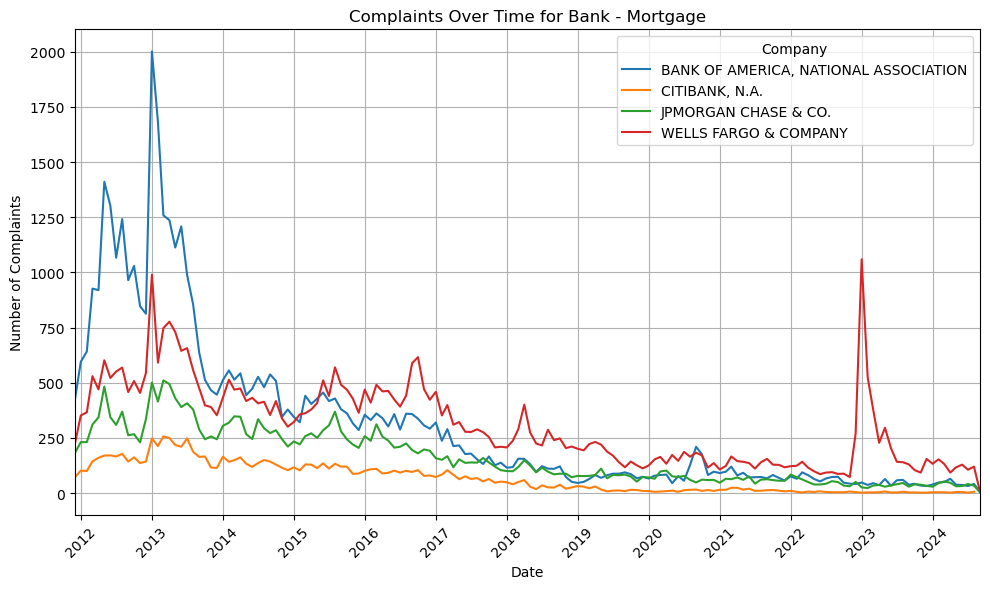

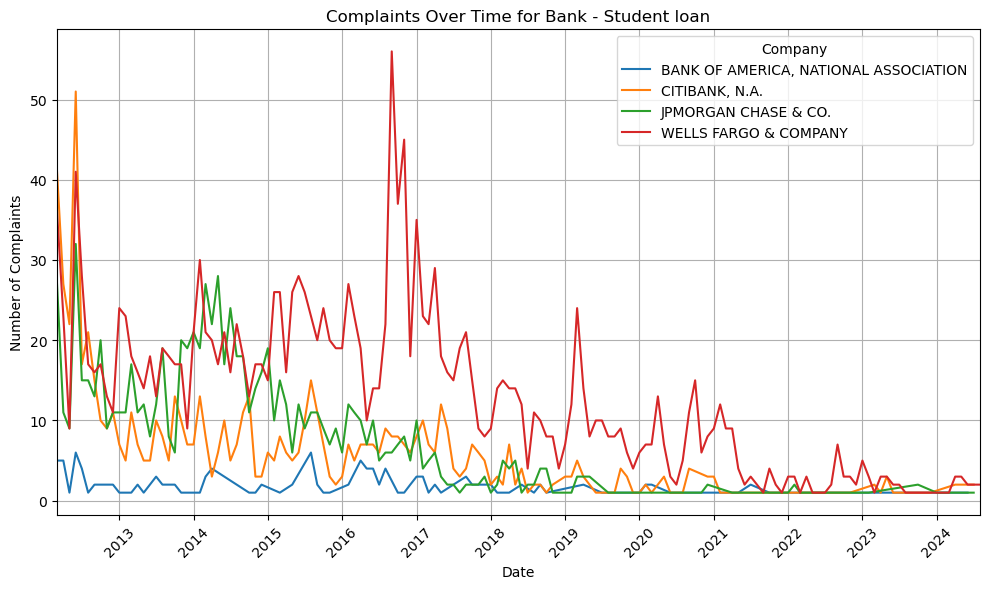

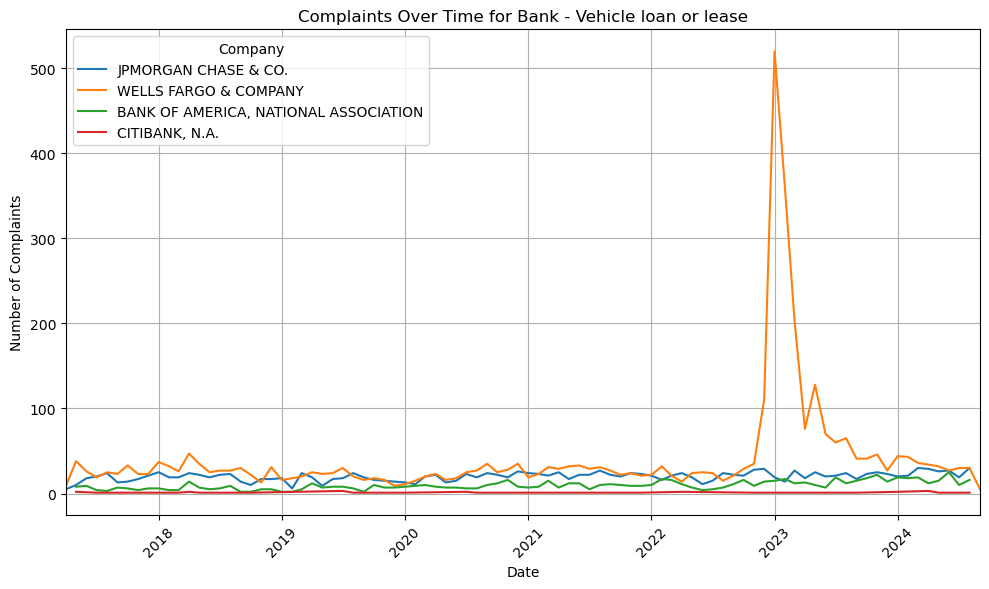

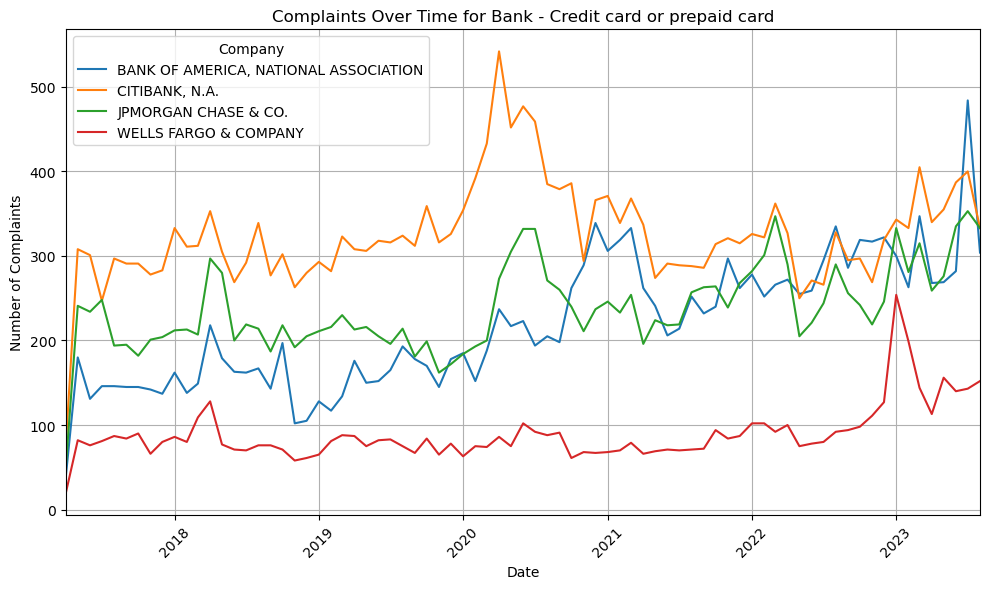

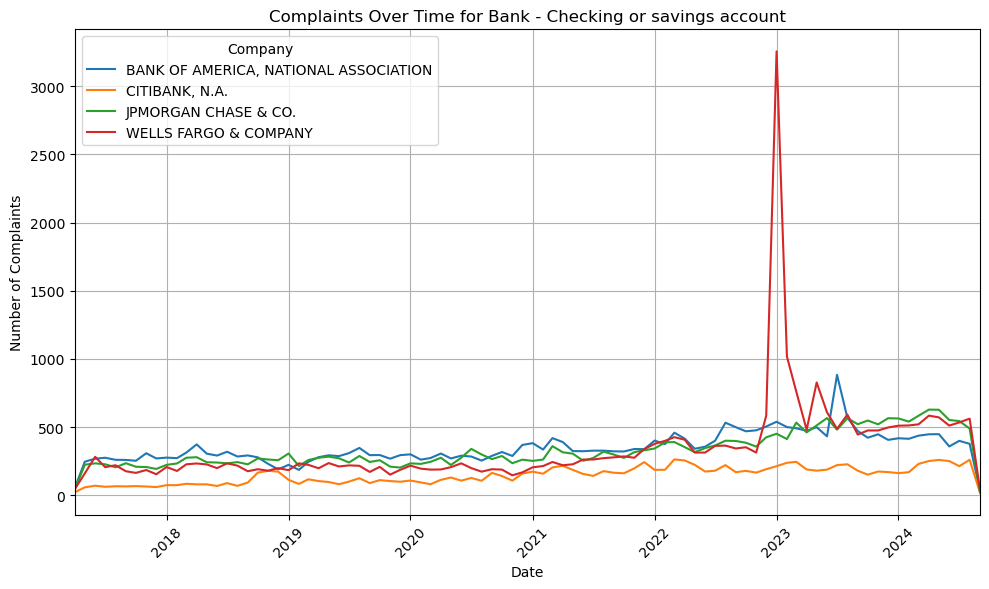

Plotting complaints for Fintechs:


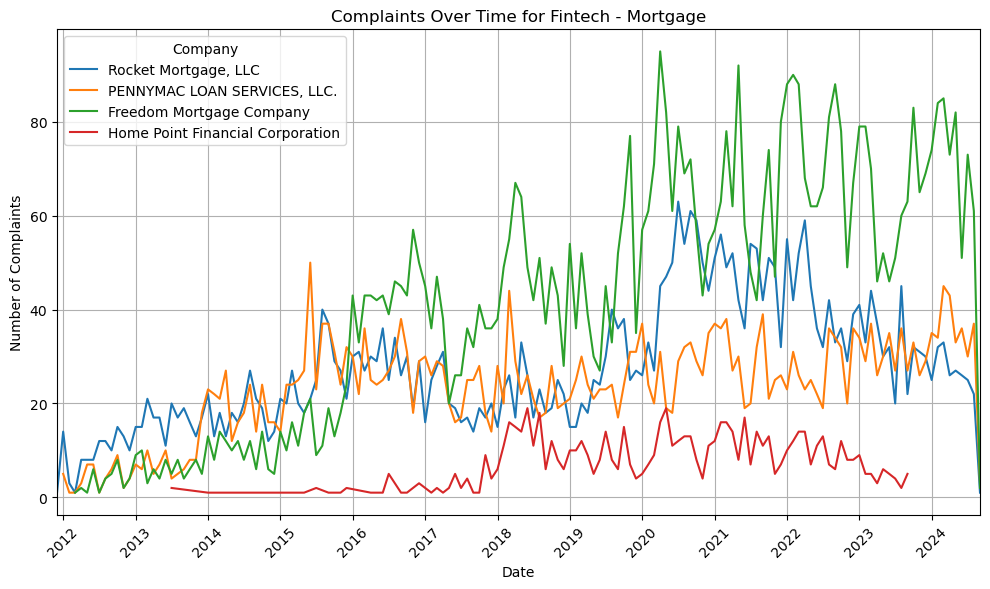

No data available to plot for Student loan (Fintech). Skipping plot.


/var/folders/h3/p4_d1j4j61g517j5_xy_gtp00000gn/T/ipykernel_93168/2240784268.py:38: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(min_year, max_year)


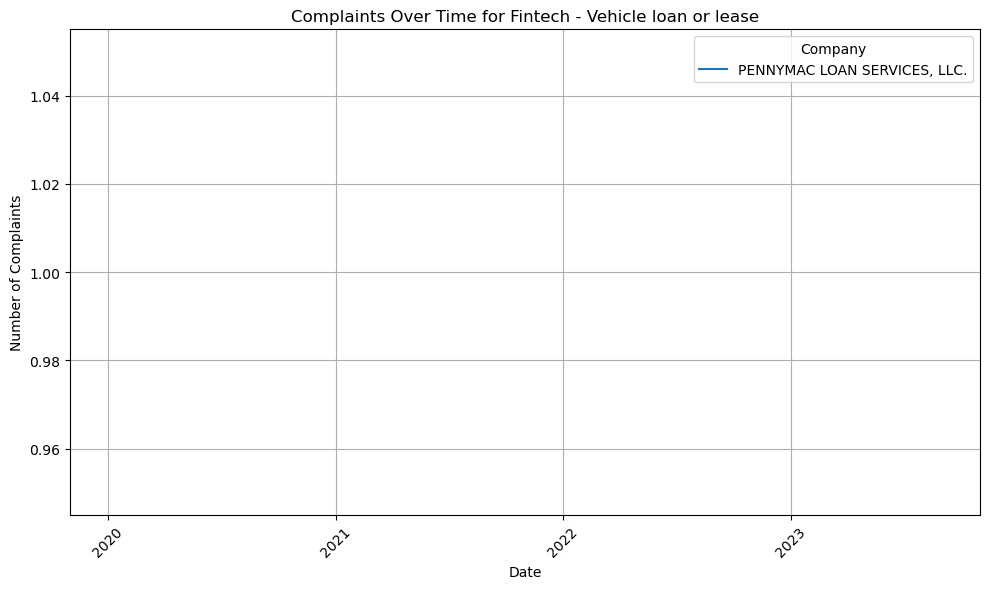

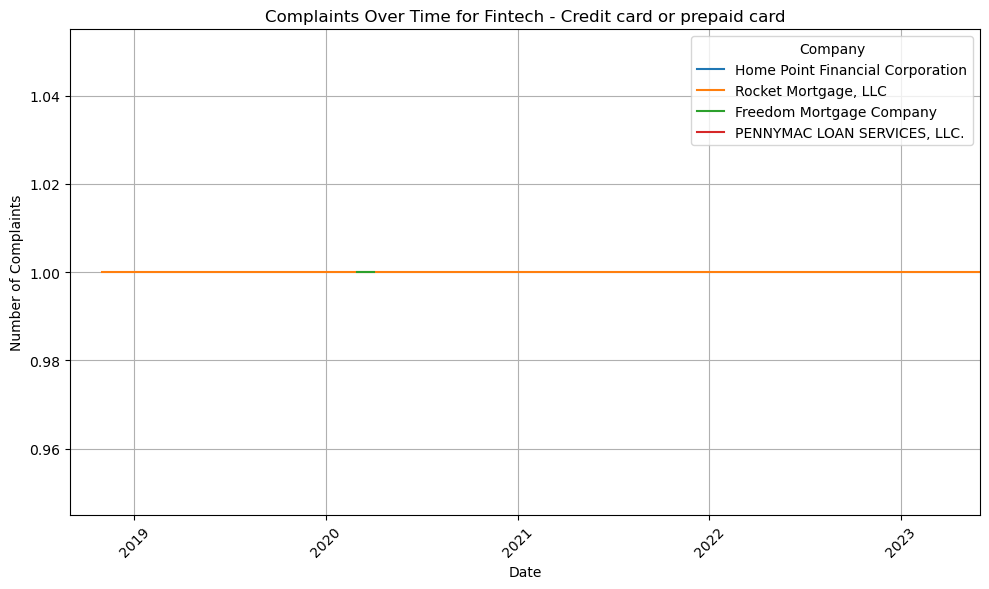

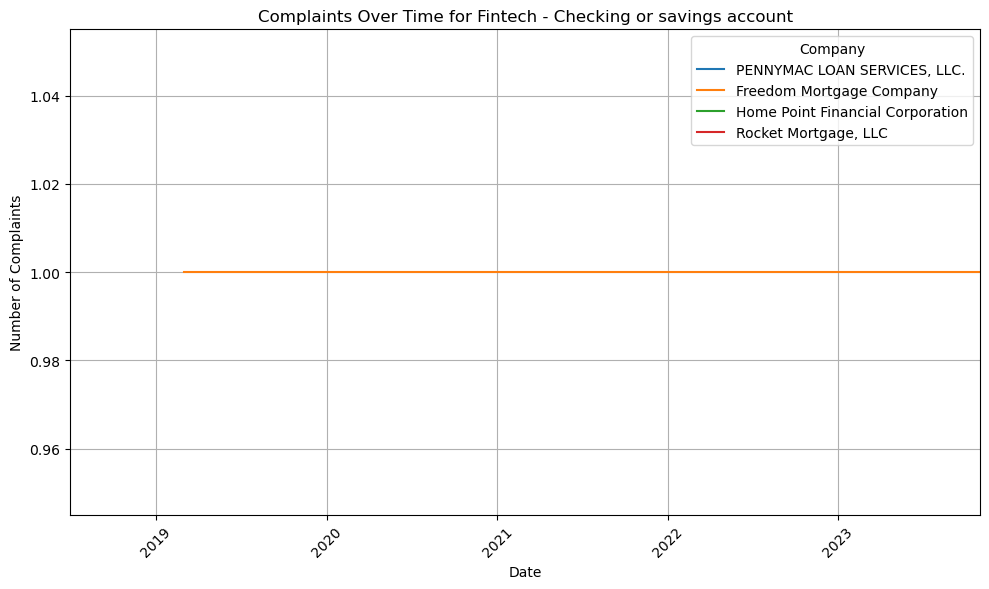

In [98]:
# Function to plot complaints over time by product and company type

def plot_complaints_by_product(filtered_data, company_type):
    for product in product_list:
        product_data = filtered_data[filtered_data['Product'] == product].copy()
        product_data['Date received'] = pd.to_datetime(product_data['Date received'], errors='coerce')
        product_data = product_data.dropna(subset=['Date received'])

        product_data['YearMonth'] = product_data['Date received'].dt.to_period('M').dt.to_timestamp()
        complaints_by_date = product_data.groupby(['YearMonth', 'Company']).size().reset_index(name='Complaint Count')

        if complaints_by_date.empty:
            print(f"No data available to plot for {product} ({company_type}). Skipping plot.")
            continue

        plt.figure(figsize=(10, 6))

        for company in complaints_by_date['Company'].unique():
            company_group = complaints_by_date[complaints_by_date['Company'] == company]
            plt.plot(company_group['YearMonth'], company_group['Complaint Count'], label=company)

        plt.title(f'Complaints Over Time for {company_type} - {product}')
        plt.xlabel('Date')
        plt.ylabel('Number of Complaints')

        min_year = complaints_by_date['YearMonth'].min()
        max_year = complaints_by_date['YearMonth'].max()
        plt.xlim(min_year, max_year)

        ax = plt.gca()
        ax.xaxis.set_major_locator(mdates.YearLocator())  # Major ticks at every year
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format ticks to show the year

        plt.xticks(rotation=45)

        plt.legend(title='Company')
        plt.grid(True)

        plt.tight_layout()
        plt.show()

banks_data = filtered[filtered['Type'] == 'Bank']
fintech_data = filtered[filtered['Type'] == 'Fintech']

print("Plotting complaints for Banks:")
plot_complaints_by_product(banks_data, "Bank")

print("Plotting complaints for Fintechs:")
plot_complaints_by_product(fintech_data, "Fintech")

Plotting complaints for Banks:


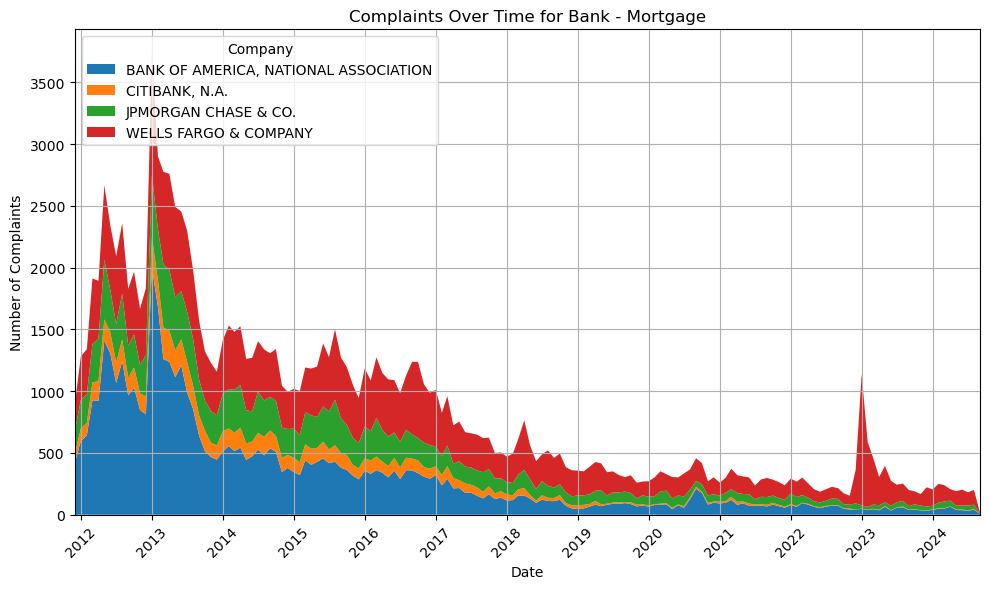

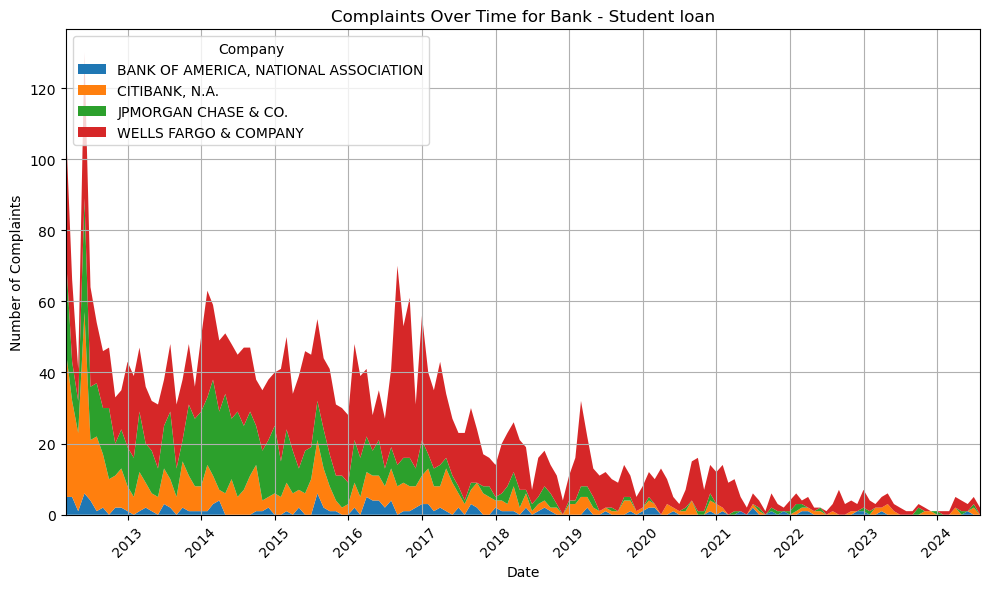

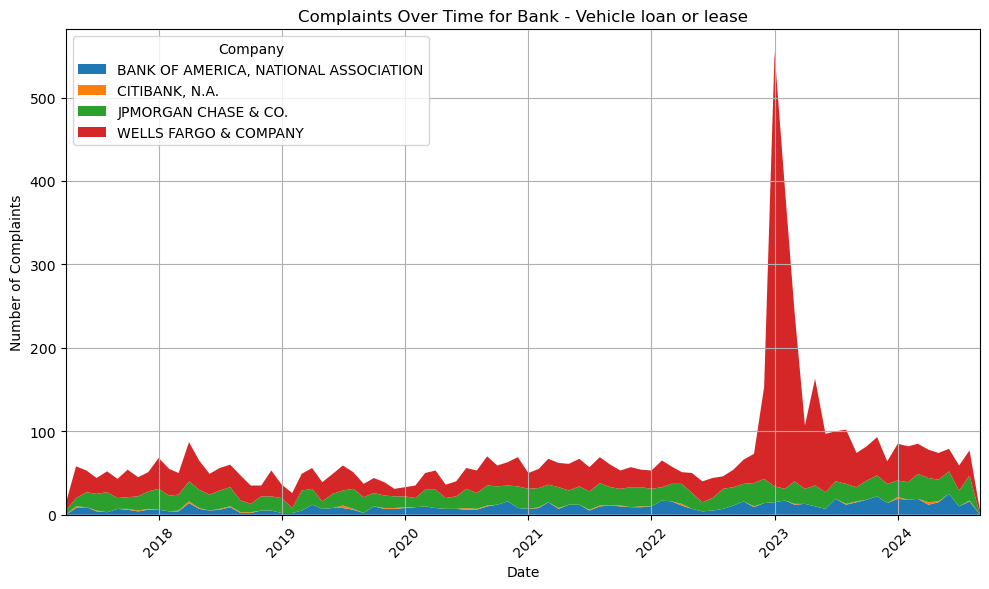

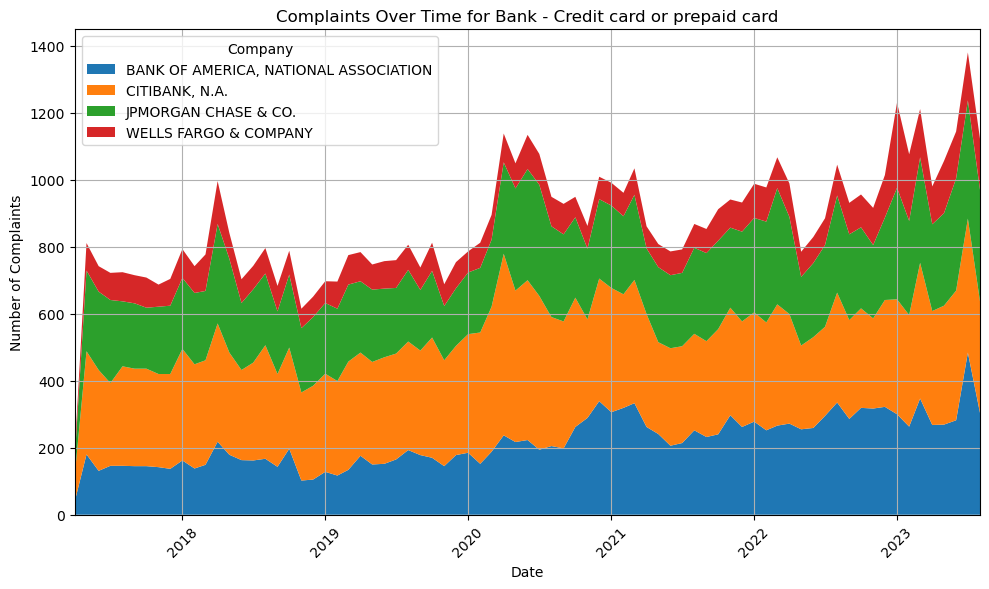

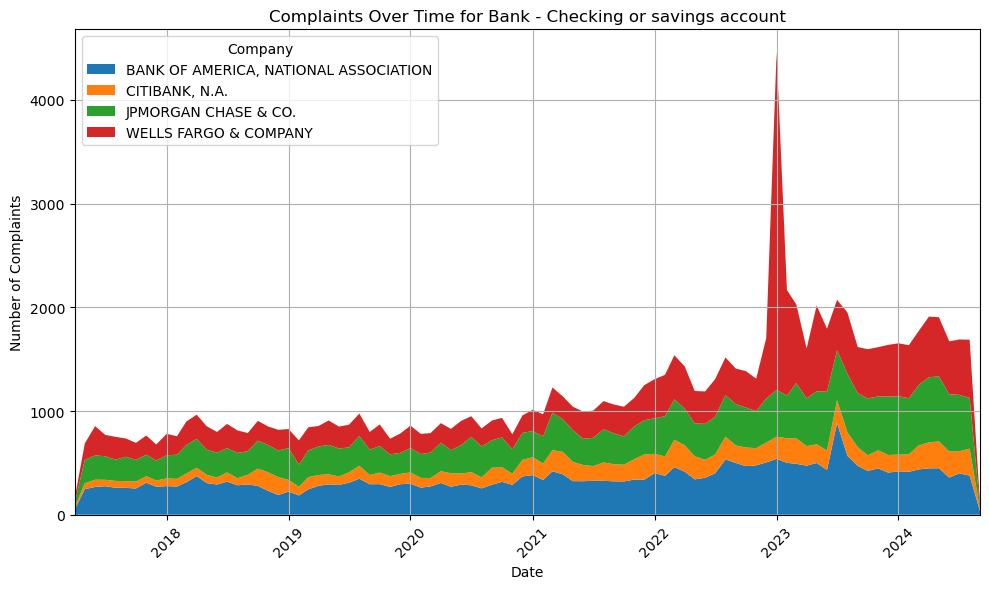

Plotting complaints for Fintechs:


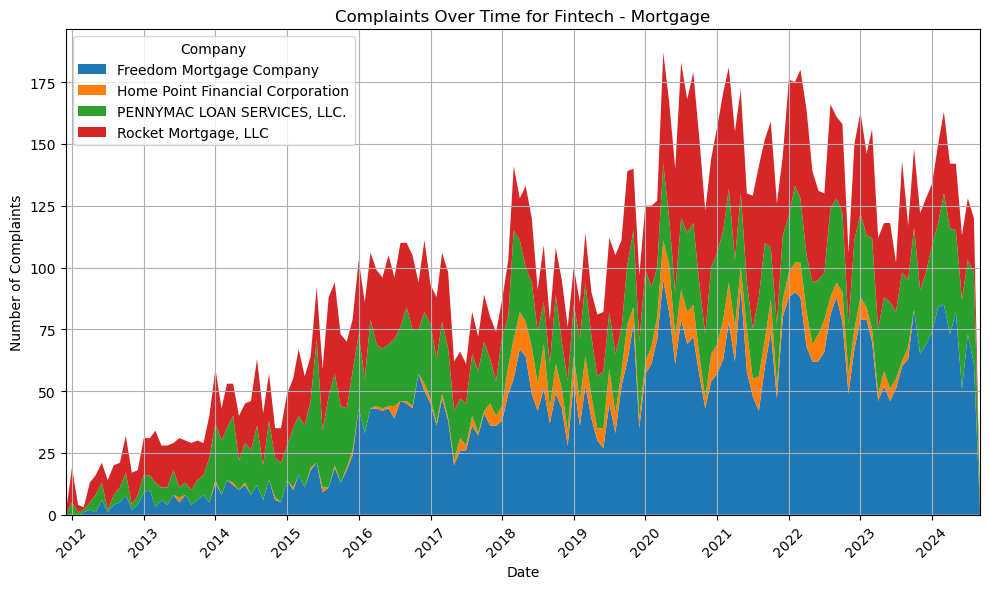

No data available to plot for Student loan (Fintech). Skipping plot.


/var/folders/h3/p4_d1j4j61g517j5_xy_gtp00000gn/T/ipykernel_93168/469303764.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(min_year, max_year)


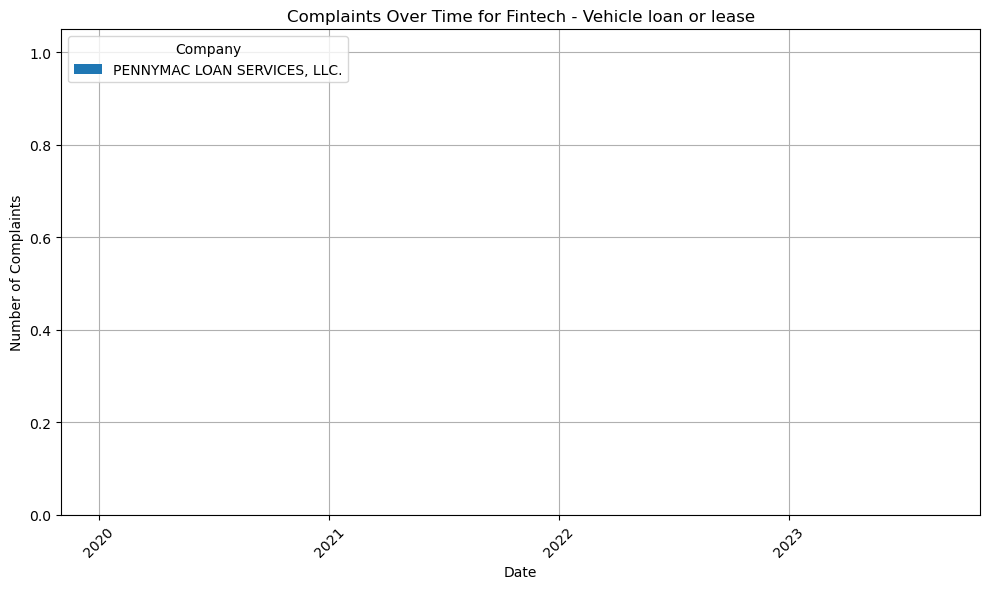

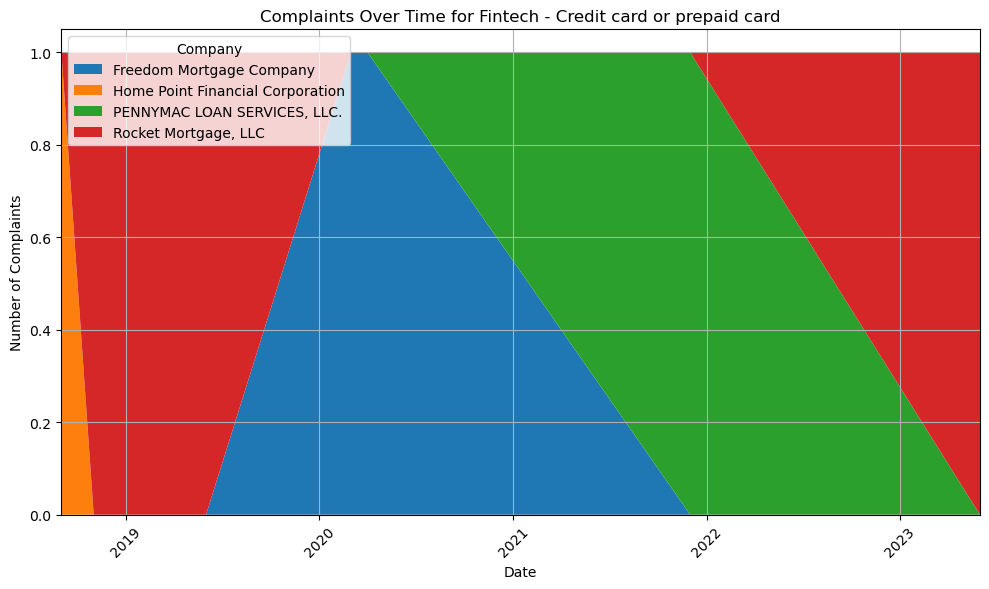

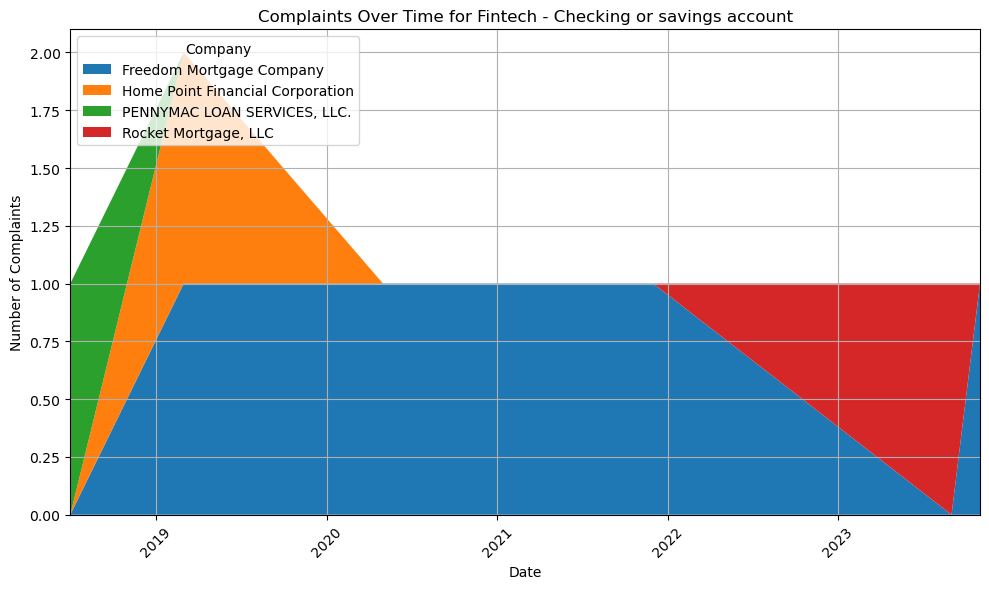

In [99]:
# Function to plot stacked complaints over time by product and company type

def plot_complaints_by_product(filtered_data, company_type):
    for product in product_list:
        product_data = filtered_data[filtered_data['Product'] == product].copy()

        product_data['Date received'] = pd.to_datetime(product_data['Date received'], errors='coerce')

        product_data = product_data.dropna(subset=['Date received'])

        product_data['YearMonth'] = product_data['Date received'].dt.to_period('M').dt.to_timestamp()
        complaints_by_date = product_data.groupby(['YearMonth', 'Company']).size().unstack(fill_value=0)

        if complaints_by_date.empty:
            print(f"No data available to plot for {product} ({company_type}). Skipping plot.")
            continue

        plt.figure(figsize=(10, 6))

        year_month = complaints_by_date.index
        complaints = [complaints_by_date[company] for company in complaints_by_date.columns]

        plt.stackplot(year_month, complaints, labels=complaints_by_date.columns)

        plt.title(f'Complaints Over Time for {company_type} - {product}')
        plt.xlabel('Date')
        plt.ylabel('Number of Complaints')

        min_year = complaints_by_date.index.min()
        max_year = complaints_by_date.index.max()
        plt.xlim(min_year, max_year)

        ax = plt.gca()
        ax.xaxis.set_major_locator(mdates.YearLocator())  # Major ticks at every year
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format ticks to show the year

        plt.xticks(rotation=45)

        plt.legend(title='Company', loc='upper left')
        plt.grid(True)

        plt.tight_layout()
        plt.show()

banks_data = filtered[filtered['Type'] == 'Bank']
fintech_data = filtered[filtered['Type'] == 'Fintech']

print("Plotting complaints for Banks:")
plot_complaints_by_product(banks_data, "Bank")

print("Plotting complaints for Fintechs:")
plot_complaints_by_product(fintech_data, "Fintech")

# Additional Data Exploration

In [100]:
fintech_data = filtered[filtered['Type'] == 'Fintech'].copy()
fintech_data['Date received'] = pd.to_datetime(fintech_data['Date received'], errors='coerce')

# Complaints for Student Loans for Fintech Companies
student_loan_complaints = fintech_data[fintech_data['Product'] == 'Student loan'].shape[0]
print(f"Number of complaints for student loans (Fintech): {student_loan_complaints}")

# Complaints for Vehicle Loan or Lease for Fintech Companies
vehicle_loan_complaints = fintech_data[fintech_data['Product'] == 'Vehicle loan or lease'].shape[0]
print(f"Number of complaints for vehicle loan or lease (Fintech): {vehicle_loan_complaints}")

# Complaints for Credit Card or Prepaid Card for Fintech Companies
credit_card_complaints = fintech_data[fintech_data['Product'] == 'Credit card or prepaid card'].shape[0]
print(f"Number of complaints for credit card or prepaid card (Fintech): {credit_card_complaints}")

# Complaints for Checking or Savings Account for Fintech Companies
checking_savings_complaints = fintech_data[fintech_data['Product'] == 'Checking or savings account'].shape[0]
print(f"Number of complaints for checking or savings account (Fintech): {checking_savings_complaints}")

Number of complaints for student loans (Fintech): 0
Number of complaints for vehicle loan or lease (Fintech): 1
Number of complaints for credit card or prepaid card (Fintech): 8
Number of complaints for checking or savings account (Fintech): 7


In [101]:
fintech_data = filtered[filtered['Type'] == 'Fintech'].copy()
fintech_data['Date received'] = pd.to_datetime(fintech_data['Date received'], errors='coerce')
fintech_data['Year'] = fintech_data['Date received'].dt.year
complaints_by_year_product = fintech_data.groupby(['Year', 'Product']).size().reset_index(name='Complaint Count')
print("Complaints by Year and Product for Fintech:")
print(complaints_by_year_product)

Complaints by Year and Product for Fintech:
    Year                      Product  Complaint Count
0   2011                     Mortgage                1
1   2012                     Mortgage              198
2   2013                     Mortgage              370
3   2014                     Mortgage              570
4   2015                     Mortgage              846
5   2016                     Mortgage             1221
6   2017                     Mortgage              971
7   2018  Checking or savings account                1
8   2018  Credit card or prepaid card                2
9   2018                     Mortgage             1270
10  2019  Checking or savings account                2
11  2019  Credit card or prepaid card                2
12  2019                     Mortgage             1257
13  2020  Checking or savings account                1
14  2020  Credit card or prepaid card                2
15  2020                     Mortgage             1821
16  2021  Checking or

In [107]:
bank_complaints = filtered[filtered['Type'] == 'Bank'].groupby('Company').size().reset_index(name='Complaint Count')
bank_complaints_sorted = bank_complaints.sort_values(by='Complaint Count', ascending=False)
print("Bank Complaints (sorted highest to lowest):")
print(bank_complaints_sorted)

# Count complaints for each fintech lender (sorted from highest to lowest)
fintech_complaints = filtered[filtered['Type'] == 'Fintech'].groupby('Company').size().reset_index(name='Complaint Count')
fintech_complaints_sorted = fintech_complaints.sort_values(by='Complaint Count', ascending=False)
print("\nFintech Complaints (sorted highest to lowest):")
print(fintech_complaints_sorted)

# Calculate percentage of timely responses for each company
timely_responses = filtered.groupby('Company')['Timely response?'].apply(lambda x: (x == 'Yes').mean() * 100).reset_index(name='Timely Response Percentage')
print("\nPercentage of Timely Responses for Each Company:")
print(timely_responses)

# Find the 3 most common issues and sub-issues for each product
for product in product_list:
    product_data = filtered[filtered['Product'] == product]

    # 3 most common issues for the product
    common_issues = product_data['Issue'].value_counts().head(3).reset_index(name='Count')
    common_issues.columns = ['Issue', 'Count']
    
    # 3 most common sub-issues for the product
    common_sub_issues = product_data['Sub-issue'].value_counts().head(3).reset_index(name='Count')
    common_sub_issues.columns = ['Sub-issue', 'Count']

    print(f"\nMost Common Issues for {product}:")
    print(common_issues)

    print(f"\nMost Common Sub-issues for {product}:")
    print(common_sub_issues)

Bank Complaints (sorted highest to lowest):
                                 Company  Complaint Count
0  BANK OF AMERICA, NATIONAL ASSOCIATION            96466
3                  WELLS FARGO & COMPANY            90351
2                   JPMORGAN CHASE & CO.            75236
1                         CITIBANK, N.A.            49334

Fintech Complaints (sorted highest to lowest):
                            Company  Complaint Count
0          Freedom Mortgage Company             6277
3              Rocket Mortgage, LLC             4242
2      PENNYMAC LOAN SERVICES, LLC.             3600
1  Home Point Financial Corporation              747

Percentage of Timely Responses for Each Company:
                                 Company  Timely Response Percentage
0  BANK OF AMERICA, NATIONAL ASSOCIATION                   97.031078
1                         CITIBANK, N.A.                   99.562168
2               Freedom Mortgage Company                   99.585789
3       Home Point Financia

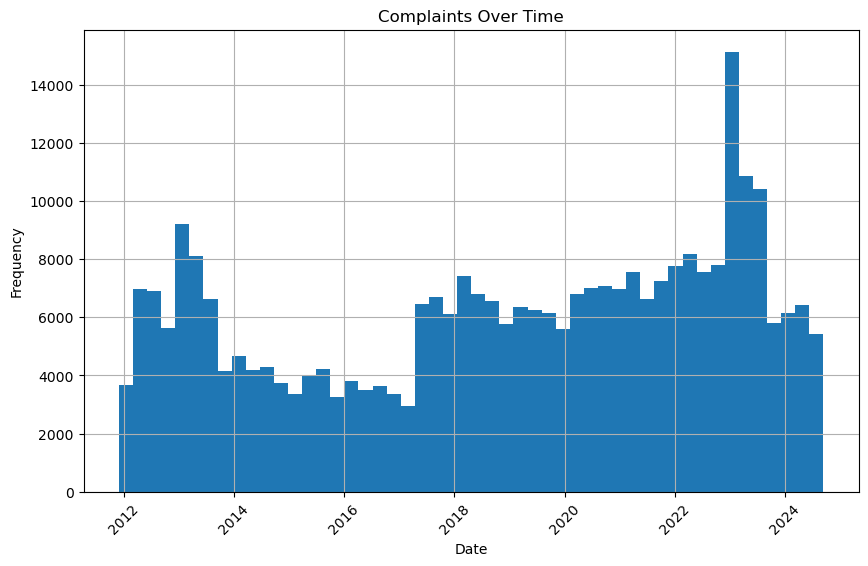

In [102]:
plt.figure(figsize=(10, 6))
plt.hist(banks_data['Date received'], bins=50)
plt.title('Complaints Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

/var/folders/h3/p4_d1j4j61g517j5_xy_gtp00000gn/T/ipykernel_93168/2543475013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banks_data['YearMonth'] = banks_data['Date received'].dt.to_period('M')


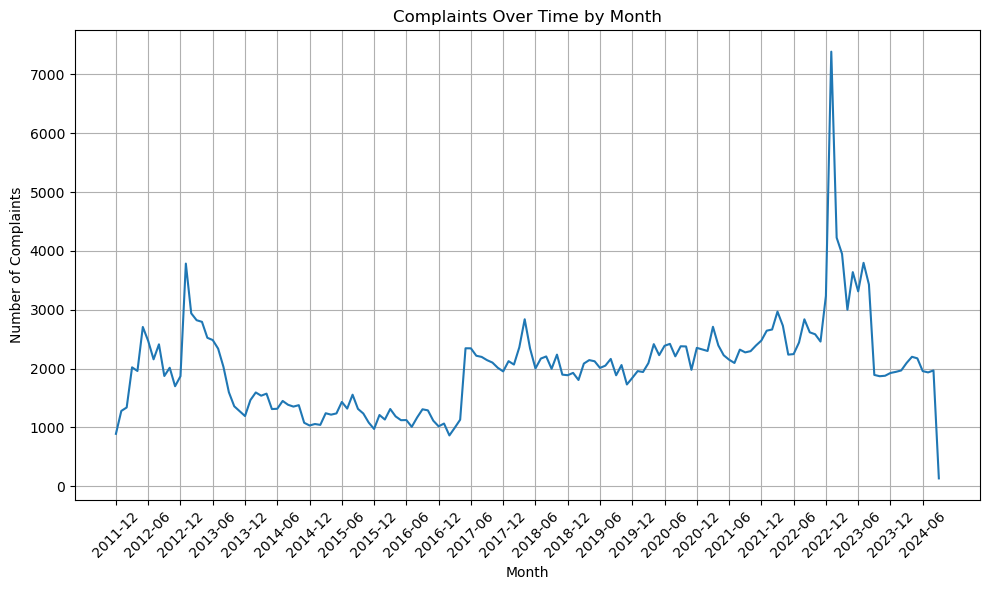

In [103]:
banks_data['YearMonth'] = banks_data['Date received'].dt.to_period('M')

complaints_by_month = banks_data.groupby('YearMonth').size().reset_index(name='Complaint Count')

# Plot the grouped data by month
plt.figure(figsize=(10, 6))

plt.plot(complaints_by_month['YearMonth'].astype(str), complaints_by_month['Complaint Count'])

plt.title('Complaints Over Time by Month')
plt.xlabel('Month')
plt.ylabel('Number of Complaints')

# Set x-ticks to label every 6th month
xtick_positions = range(0, len(complaints_by_month), 6)  # Every 6th month
xtick_labels = complaints_by_month['YearMonth'].astype(str).iloc[xtick_positions]

plt.xticks(ticks=xtick_positions, labels=xtick_labels, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [110]:
# 1. Table for the number of complaints for each product
complaints_by_product = banks_product.groupby('Product').size().reset_index(name='Number of Complaints')
complaints_by_product = complaints_by_product.sort_values(by='Number of Complaints', ascending=False)
print("Table for Complaints by Product:")
print(complaints_by_product)

# 2. Table for the number of complaints for each company
complaints_by_company = banks_product.groupby('Company').size().reset_index(name='Number of Complaints')
complaints_by_company = complaints_by_company.sort_values(by='Number of Complaints', ascending=False)
print("\nTable for Complaints by Company:")
print(complaints_by_company)

# 3. Table for the number of complaints by both product and company
complaints_by_product_company = banks_product.groupby(['Product', 'Company']).size().reset_index(name='Number of Complaints')
complaints_by_product_company = complaints_by_product_company.sort_values(by='Number of Complaints', ascending=False)
print("\nTable for Complaints by Product and Company:")
print(complaints_by_product_company)

# 4. Table for number of complaints by year, sorted
banks_product['Year'] = banks_product['Date received'].dt.year
complaints_by_year = banks_product.groupby('Year').size().reset_index(name='Number of Complaints')
complaints_by_year = complaints_by_year.sort_values(by='Number of Complaints', ascending=False)
print("Table for Complaints by Year (Highest to Lowest):")
complaints_by_year

Table for Complaints by Product:
                       Product  Number of Complaints
2                     Mortgage                129457
0  Checking or savings account                104827
1  Credit card or prepaid card                 67053
4        Vehicle loan or lease                  6365
3                 Student loan                  3685

Table for Complaints by Company:
                                 Company  Number of Complaints
0  BANK OF AMERICA, NATIONAL ASSOCIATION                 96466
3                  WELLS FARGO & COMPANY                 90351
2                   JPMORGAN CHASE & CO.                 75236
1                         CITIBANK, N.A.                 49334

Table for Complaints by Product and Company:
                        Product                                Company  \
8                      Mortgage  BANK OF AMERICA, NATIONAL ASSOCIATION   
11                     Mortgage                  WELLS FARGO & COMPANY   
0   Checking or savings account 

,Year,Number of Complaints
12,2023,40299
11,2022,31660
10,2021,27961
2,2013,27139
9,2020,26736
7,2018,26129
8,2019,23828
1,2012,23803
6,2017,21371
3,2014,16479


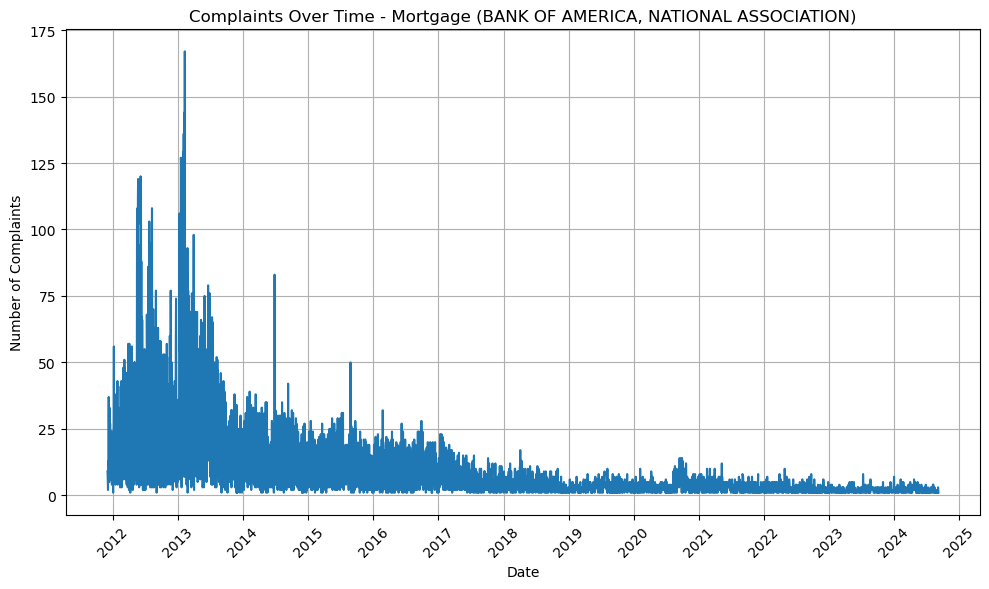

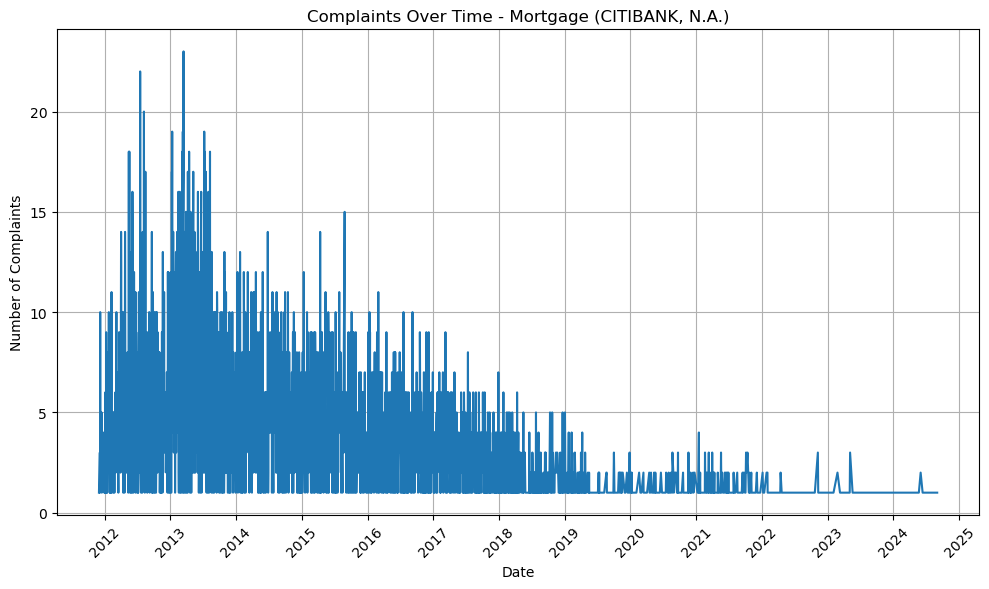

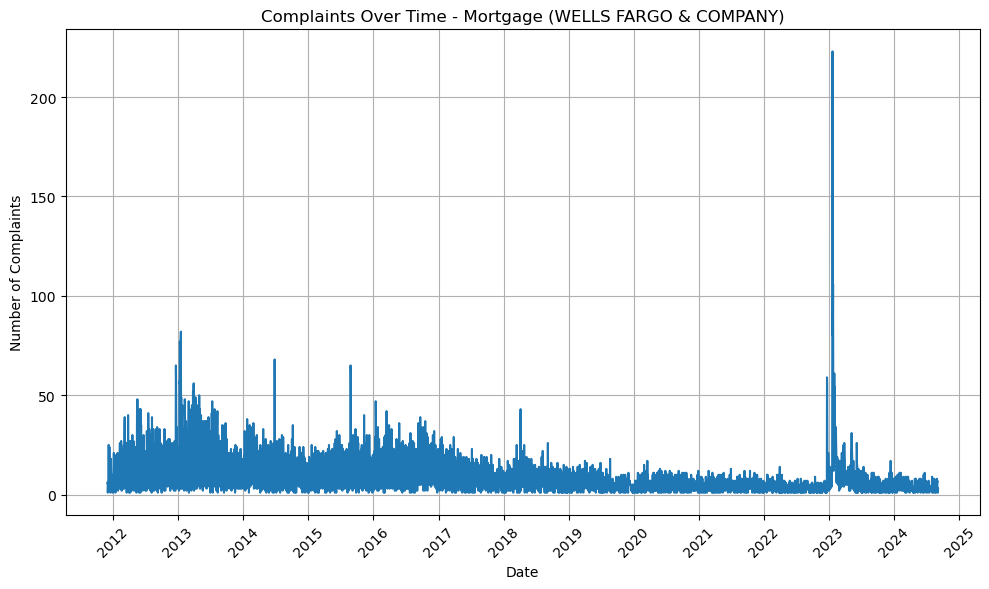

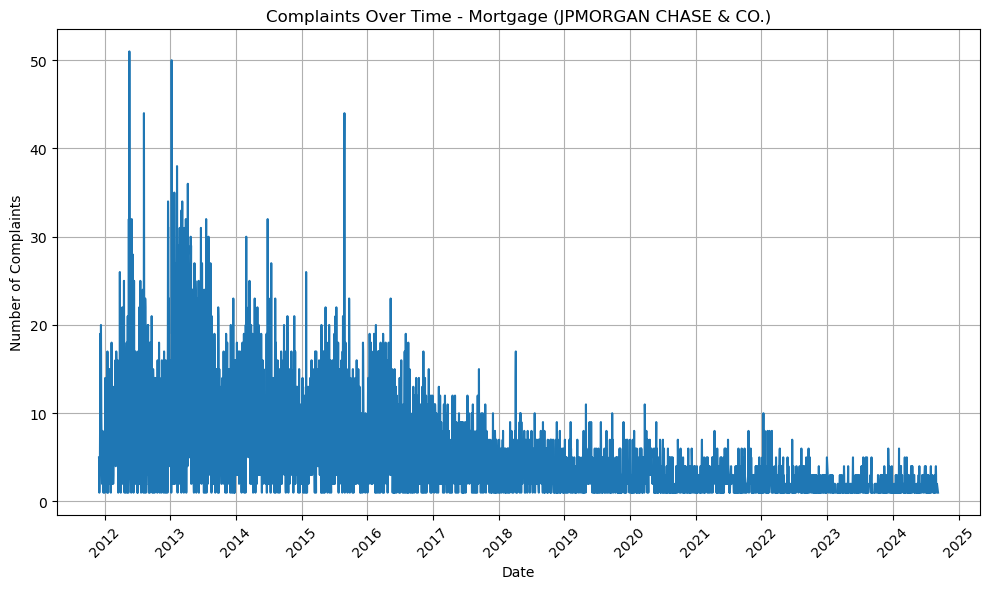

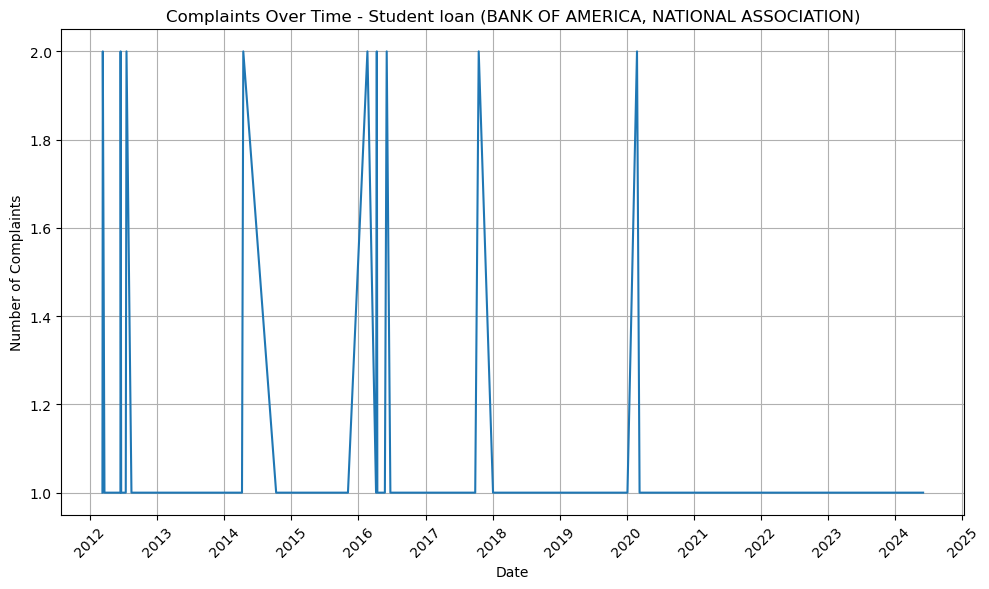

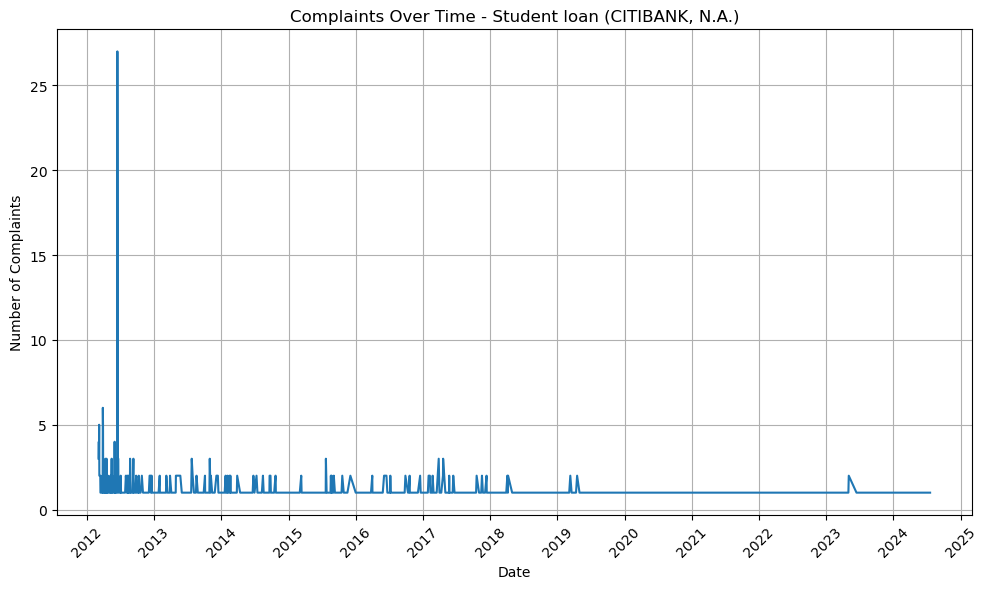

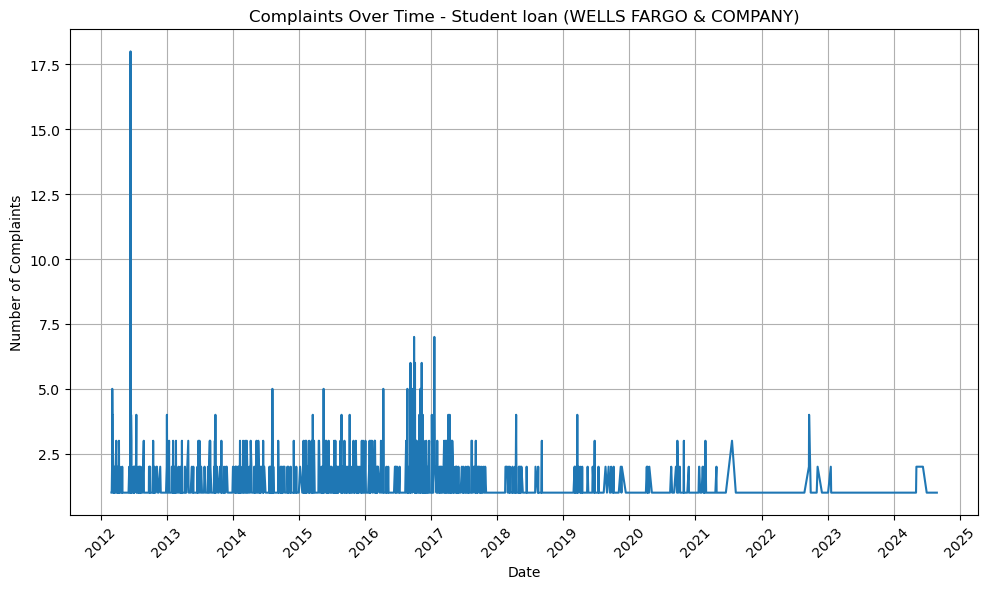

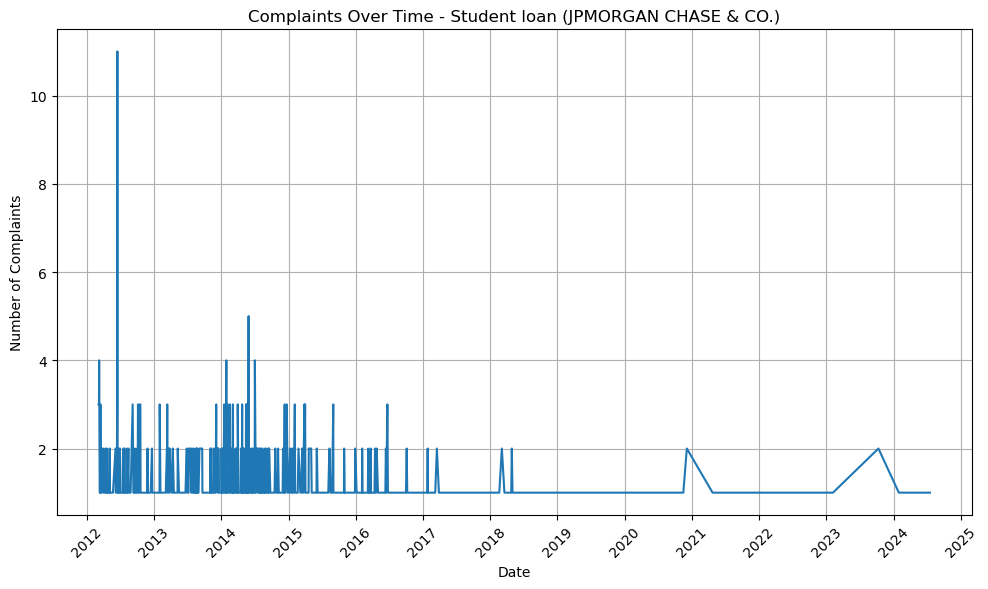

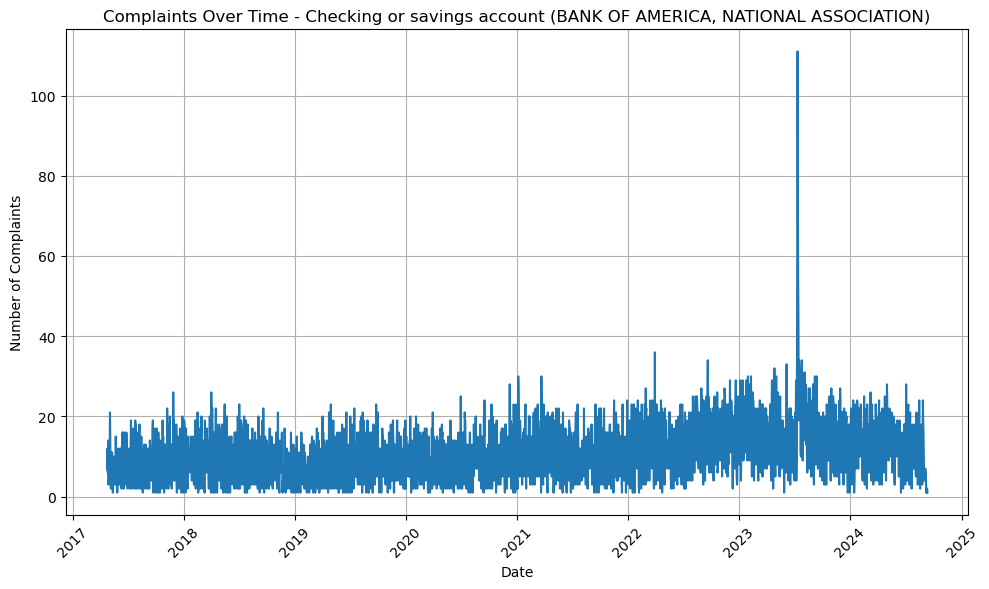

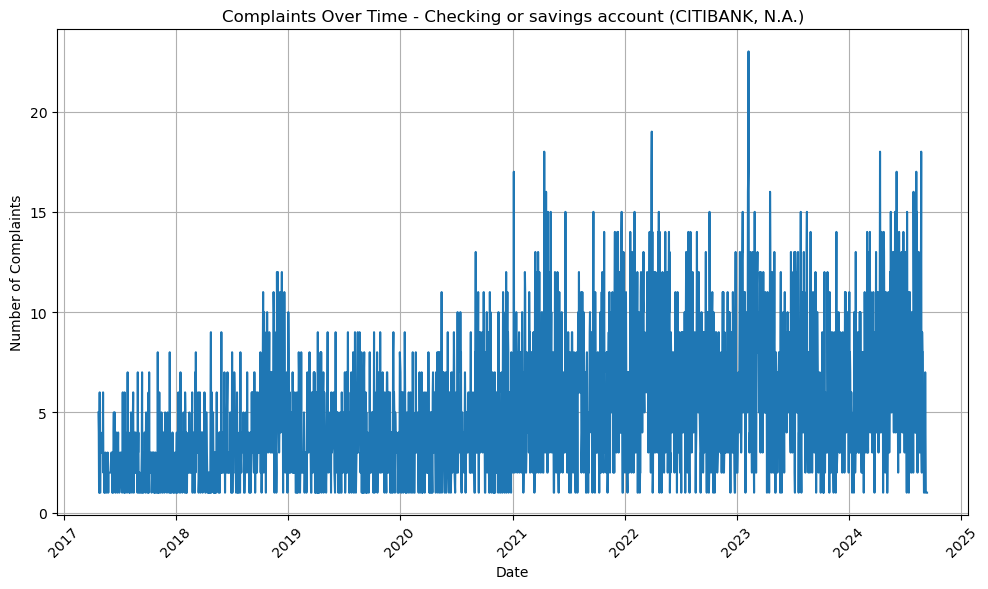

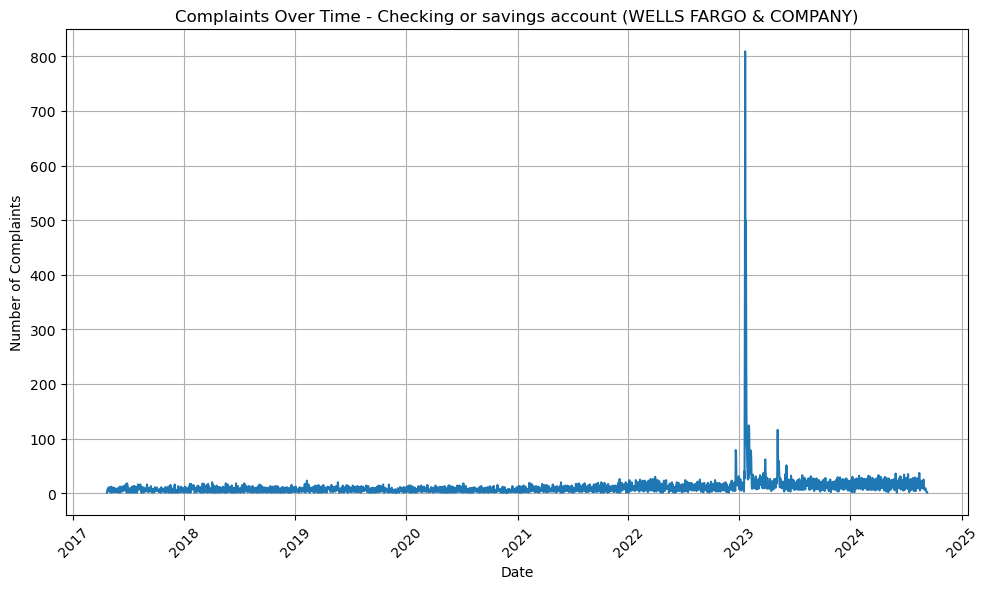

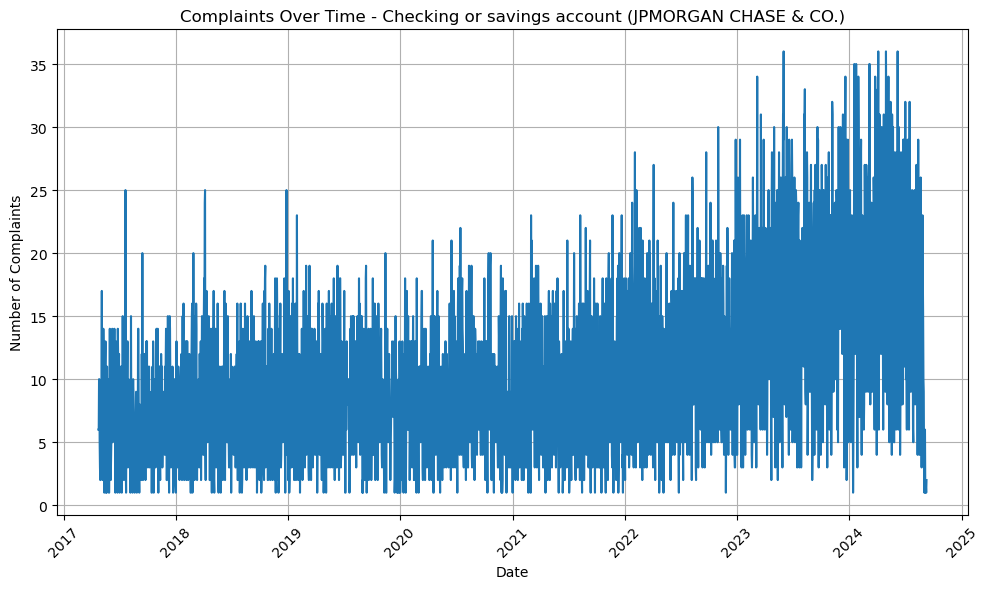

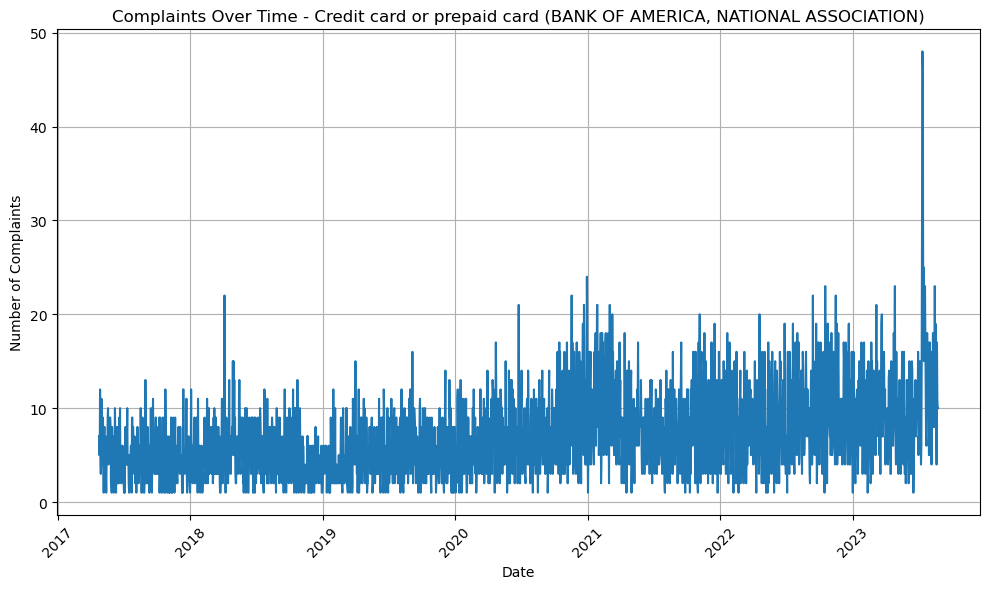

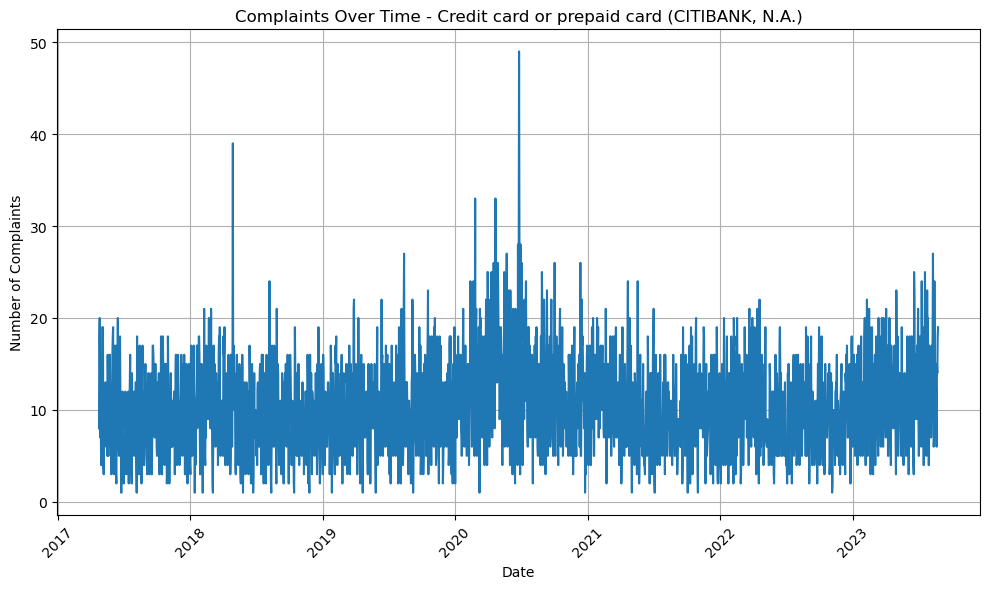

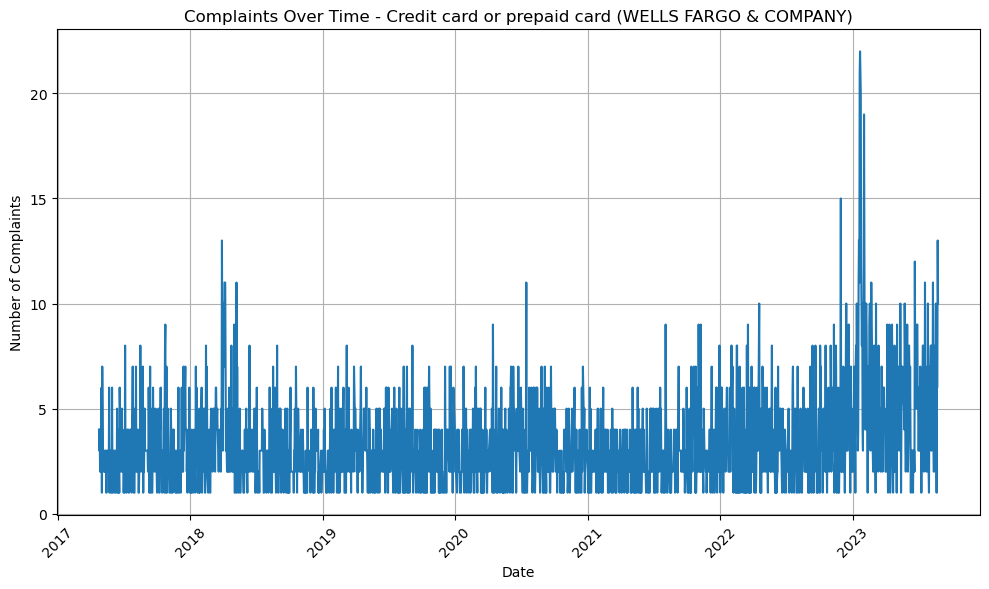

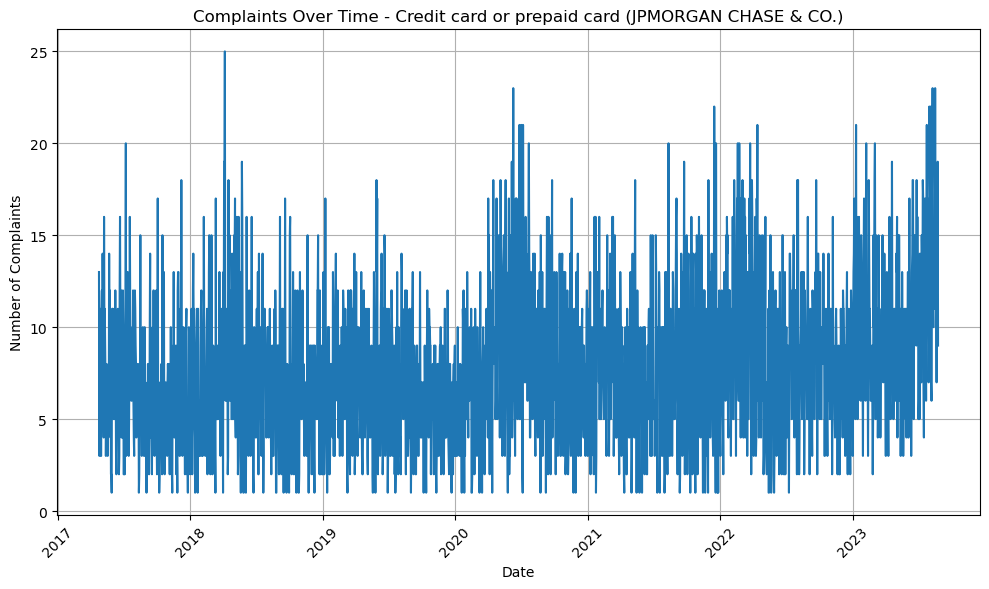

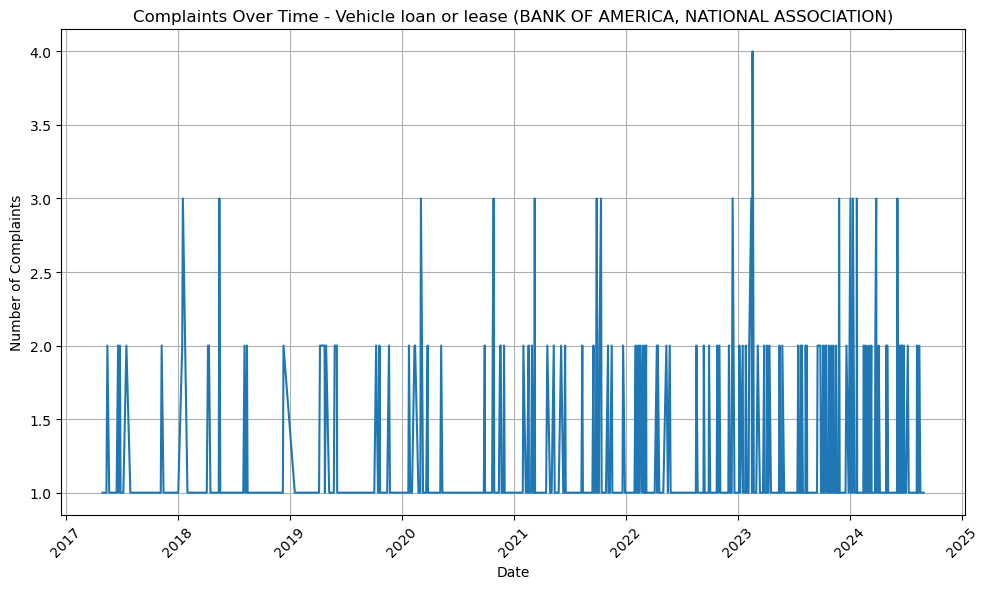

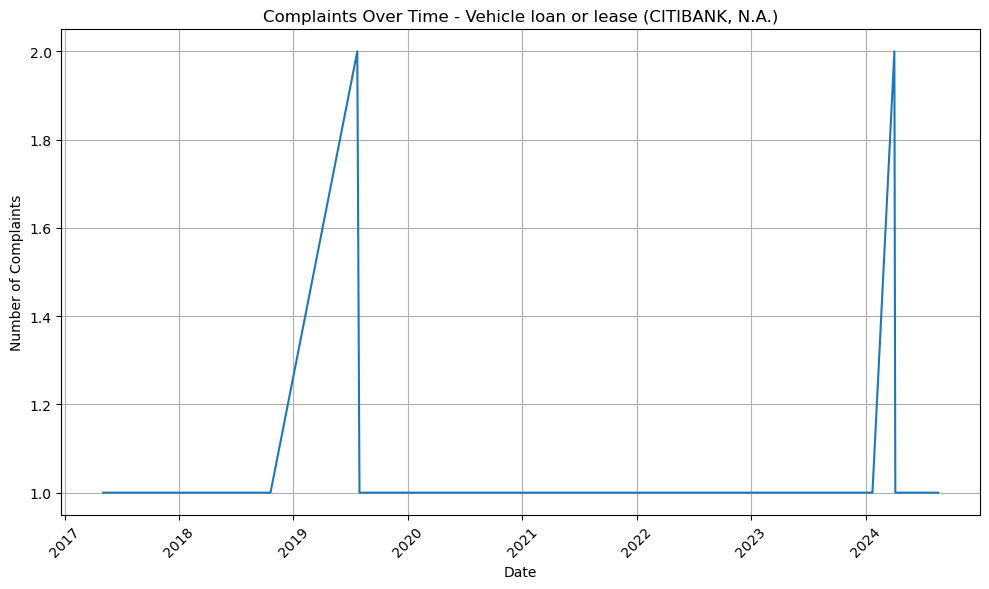

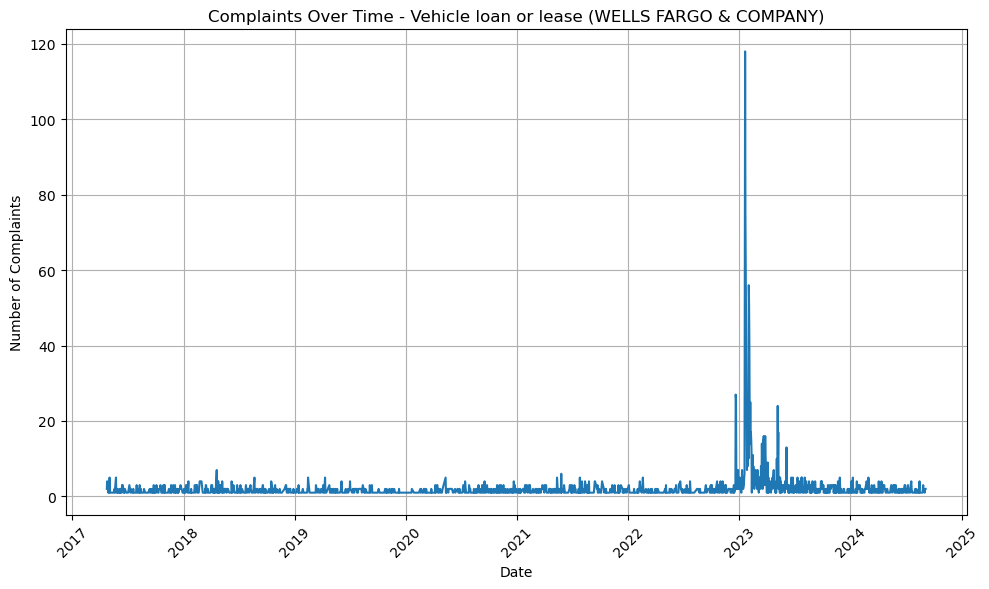

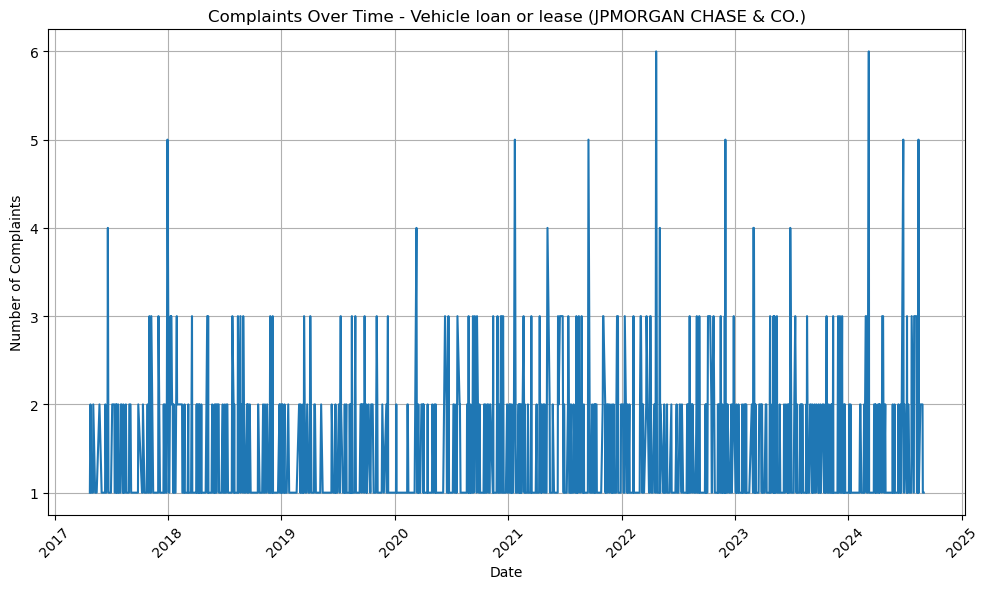

In [106]:
# Function to plot complaints over time for each unique product and each company separately
def plot_complaints_by_product_and_company():
    unique_products = product_list['Product'].unique()

    for product in unique_products:
        product_data = product_list[product_list['Product'] == product]

        for bank in banks_list:
            plt.figure(figsize=(10, 6))

            bank_data = product_data[product_data['Company'] == bank]
            bank_data = bank_data.groupby('Date received').size().reset_index(name='Complaint Count')

            plt.plot(bank_data['Date received'], bank_data['Complaint Count'], label=f'{bank}')

            plt.title(f'Complaints Over Time - {product} ({bank})')
            plt.xlabel('Date')
            plt.ylabel('Number of Complaints')

            plt.gca().xaxis.set_major_locator(mdates.YearLocator())
            plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
            plt.xticks(rotation=45)

            plt.grid(True)

            plt.tight_layout()
            plt.show()

plot_complaints_by_product_and_company()